In [1]:
#Import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import os
from scipy.spatial import distance_matrix

In [2]:
os.chdir('E:\\Data_science\\Microland\\Assignment2\\Output')

#### Importing the dataset so that we can use it for the further proceedings :
Read Data

In [3]:
df = pd.read_excel('Vehicle_routing_problem.xlsx')


In [4]:
# See Data in the file
df.columns

Index(['place', 'weight', 'x_coordinate', 'y_coordinate'], dtype='object')

In [5]:
# Getting the information of the dataframe.
df.info()  # All data types are integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   place         100 non-null    int64
 1   weight        100 non-null    int64
 2   x_coordinate  100 non-null    int64
 3   y_coordinate  100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [6]:
df[df.duplicated()]

,place,weight,x_coordinate,y_coordinate


In [7]:
df.nunique()

place           100
weight           58
x_coordinate     60
y_coordinate     57
dtype: int64

In [7]:
df.isnull().sum() # No data point is missing or having NAN value

place           0
weight          0
x_coordinate    0
y_coordinate    0
dtype: int64

In [8]:
#Understand the distribution of the data
df.tail()

,place,weight,x_coordinate,y_coordinate
95,96,90,19,-7
96,97,101,25,13
97,98,143,-15,-26
98,99,130,3,9
99,100,119,-36,-19


In [9]:
df.head()

,place,weight,x_coordinate,y_coordinate
0,1,109,14,-2
1,2,94,12,3
2,3,112,-19,-5
3,4,117,24,16
4,5,114,-1,9


### Visualization and Understanding the data : plotting with matplolib and Seaborn
Plotting the Scatter chart for showing the location based on x and y coordinates

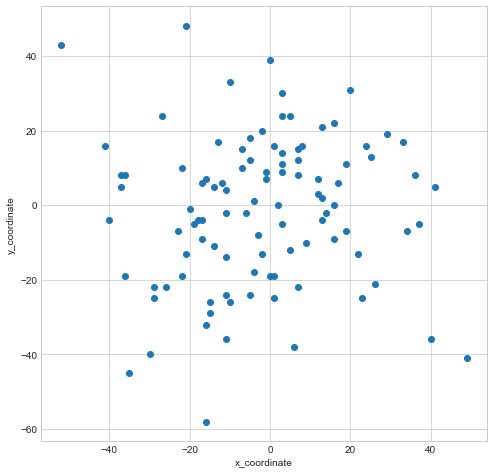

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(df.x_coordinate,df.y_coordinate)
plt.xlabel("x_coordinate")
plt.ylabel("y_coordinate")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


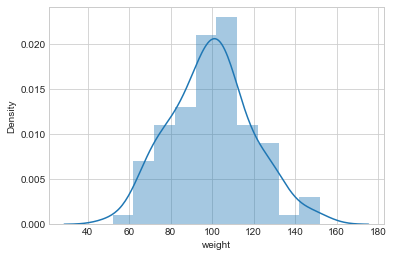

In [11]:
# Plotting the distribution chart for showing the weights distribution
sns.distplot(df['weight'])

Creating Copy for future reference

In [79]:
df1=df.copy()

## Getting the Vertices of poinys from x and y cordinates 
## Finding the distance between all points with each other 

Creating Distance matrix from the x_coordinate and y_coordinate
Distance Matrix is created to get distance between any two places 

'''
scipy.spatial.distance_matrix(x, y, p=2, threshold=1000000).

Compute the distance matrix.
Returns the matrix of all pair-wise distances.

Parameters:
x(M, K) array_like : Matrix of M vectors in K dimensions.
y(N, K) array_like : Matrix of N vectors in K dimensions.

pfloat, 1 <= p <= infinity : Which Minkowski p-norm to use.
Minkowski distance is  used with p being 1 or 2, which correspond to the Manhattan distance and the Euclidean distance

thresholdpositive int: If M * N * K > threshold, algorithm uses a Python loop instead of large temporary arrays.
Returns: result(M, N) ndarray
'''

In [80]:
pair=df[['x_coordinate','y_coordinate']].to_numpy() # Created vertices from the x y coordinates
dist_mat = distance_matrix(pair, pair, p=2) 

In [81]:
dist_mat=np.array(dist_mat)

In [84]:
dist_mat.shape

(100, 100)

In [15]:
# Total Number of Places required to visit to collect weights/parcels
noofplaces = len(df["place"])

##### Get the Starting point of the truck for the transportation

In [58]:
start_point= int(input('Enter Any place number from 1-100 as a Starting Point: '))

Enter Any place number from 1-100 as a Starting Point: 19


In [61]:
start_point 

19

In [62]:
# Simplification for creating parmaters according to starting point
index=start_point-1

In [63]:
index

18

In [86]:
dist_mat_row = dist_mat[index] # Extracting List of values for the start_point data from the distance matrix

In [88]:
df['dist']=dist_mat_row # Adding extracted list to dataframe 

In [91]:
df=df.sort_values("dist", ignore_index=True) # Sorting The values According to the distance 

In [92]:
df

,place,weight,x_coordinate,y_coordinate,dist
0,19,102,-5,12,0.000000
1,45,82,-7,10,2.828427
2,64,81,-7,15,3.605551
3,5,114,-1,9,5.000000
4,77,88,-5,18,6.000000
...,...,...,...,...,...
95,30,97,-30,-40,57.697487
96,38,77,-35,-45,64.412732
97,23,103,40,-36,65.795137
98,24,146,-16,-58,70.859015


###### Defining Variables required for the programm

In [93]:
# Transportation distance
dist_travel=0
totaldist=[]
placepointpath=[]

# Transported Weight
wt0= df['weight'][0] 
totalwt=[]

#Transportation Cost
cost1,cost = 0,0    
totalcost=[]

##### Programm to get Minimum distance to reach destination for places data or dist data

In [94]:
for i in range(noofplaces): 
    # Staring Point
    if i==0:
        cost=0
        wt=wt0
        placepointpath.append(df['place'][0]) 
    # 1st Point
    elif i==1:  
        # Get the Transportation Cost, weights, distance travelled by the truk 
        # and place to visit as next stop/destination 
        cost0= wt0*np.array(df['dist'][i])
        wt = wt0+df['weight'][i]
        cost= cost0 
        dist_travel=dist_travel+np.array(df['dist'][i])
        placepointpath.append(df['place'][i])              
        # Dropping the place/location which is considered already for cost calulation
        df = df.iloc[1: , :]
        df.reset_index(inplace = True, drop = True)
        #print('****** row 0 removed ******')
        # Recreating Distance Matrix for remaining locations
        pair=df[['x_coordinate','y_coordinate']].to_numpy()
        dist_mat = distance_matrix(pair, pair, p=2)     
        df['dist'] = dist_mat[0]
        df=df.sort_values("dist")
        df.reset_index(inplace = True, drop = True) # Reseting The Index
    # End Point
    elif i==(noofplaces-1):
        #print('This is the destination point')
        j=1        
        cost1 = wt * np.array(df['dist'][j])
        wt= wt+df['weight'][j]
        dist_travel=dist_travel+np.array(df['dist'][j])
        cost=cost+cost1 
        placepointpath.append(df['place'][1])
    # In between Places
    else:
        j=1        
        cost1 = wt * np.array(df['dist'][j])
        wt= wt+df['weight'][j]
        dist_travel=dist_travel+np.array(df['dist'][j])
        cost=cost+cost1 
        placepointpath.append(df['place'][j])
        #print('#####################')       
        # Dropping the place/location which is considered already for cost calulation
        df = df.iloc[1: , :]
        df.reset_index(inplace = True, drop = True)
        #print('****** row 0 removed ******')
        # Recreating Distance Matrix for remaining locations
        pair=df[['x_coordinate','y_coordinate']].to_numpy()
        dist_mat = distance_matrix(pair, pair, p=2)     
        df['dist'] = dist_mat[0]
        df=df.sort_values("dist")
        df.reset_index(inplace = True, drop = True)
        df2=df[['place','weight','dist']]        
    #print(wt,placepointpath)
    totalcost.append(cost)  # Get the sum of all cost valeues at each stop point
    totaldist.append(dist_travel) # Get the sum of all distance covered valeues at each stop point
    totalwt.append(wt)  # Get the sum of all wights valeues at each stop point

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [95]:
len(totalcost)

100

In [96]:
totalcost

[0,
 288.4995667241114,
 1208.4995667241114,
 2163.9706547220685,
 3436.7302549608567,
 5716.730254960857,
 7309.134726192962,
 9283.134726192962,
 10803.134726192962,
 14363.134726192962,
 16371.134726192962,
 23803.824683402265,
 28119.66956013266,
 34579.669560132665,
 42949.669560132665,
 46312.715798292345,
 49847.939270719515,
 54554.44200629718,
 57002.44568276501,
 68726.56616150455,
 90293.44180449002,
 97634.34420133471,
 99787.34420133471,
 104894.52346194423,
 115609.76121012322,
 124558.73947582484,
 135525.9656520282,
 157245.6880259445,
 168637.82886952607,
 171494.82886952607,
 189278.82886952607,
 207788.67524922354,
 224611.93010671172,
 231805.36079032853,
 246572.35371373713,
 256907.35371373713,
 268136.60168499505,
 291508.00515162497,
 356125.5966031794,
 417990.07281529973,
 458445.69363614486,
 476638.34270108317,
 506110.55334093847,
 521517.0739409961,
 550784.9676984908,
 560697.4570427474,
 573544.1730433446,
 590158.5533206827,
 596808.1854909611,
 615992.

In [97]:
len(totaldist)

100

In [98]:
totaldist

[0,
 2.8284271247461903,
 7.82842712474619,
 11.43397840021018,
 15.039529675674169,
 20.039529675674167,
 22.86795680042036,
 25.86795680042036,
 27.86795680042036,
 31.86795680042036,
 33.86795680042036,
 40.57616073291973,
 44.18171200838372,
 49.18171200838372,
 55.18171200838372,
 57.41777998588351,
 59.6538479633833,
 62.48227508812949,
 63.89648865050258,
 70.29961288793544,
 81.47995277543438,
 85.08550405089838,
 86.08550405089838,
 88.32157202839817,
 92.79370798339775,
 96.39925925886175,
 100.64189994598104,
 108.70415769427959,
 112.82726331989724,
 113.82726331989724,
 119.82726331989724,
 125.91002585019547,
 131.29519065732998,
 133.53125863482978,
 138.00339458982936,
 141.00339458982936,
 144.16567224999773,
 150.56879648743057,
 167.68603925605427,
 183.71725879793567,
 193.91529782512123,
 198.3874337801208,
 205.45850159198628,
 209.06405286745027,
 215.77225679994964,
 218.00832477744945,
 220.83675190219563,
 224.44230317765962,
 225.85651674003273,
 229.85651674

In [99]:
len(totalwt)

100

In [100]:
totalwt

[102,
 184,
 265,
 353,
 456,
 563,
 658,
 760,
 890,
 1004,
 1108,
 1197,
 1292,
 1395,
 1504,
 1581,
 1664,
 1731,
 1831,
 1929,
 2036,
 2153,
 2284,
 2396,
 2482,
 2585,
 2694,
 2763,
 2857,
 2964,
 3043,
 3124,
 3217,
 3302,
 3445,
 3551,
 3650,
 3775,
 3859,
 3967,
 4068,
 4168,
 4273,
 4363,
 4433,
 4542,
 4608,
 4702,
 4796,
 4900,
 5009,
 5136,
 5237,
 5354,
 5461,
 5571,
 5641,
 5772,
 5874,
 5995,
 6093,
 6245,
 6297,
 6400,
 6520,
 6612,
 6700,
 6798,
 6905,
 7028,
 7158,
 7270,
 7368,
 7440,
 7532,
 7663,
 7762,
 7858,
 7964,
 8038,
 8113,
 8204,
 8287,
 8378,
 8451,
 8577,
 8655,
 8772,
 8891,
 8958,
 9072,
 9164,
 9250,
 9383,
 9447,
 9544,
 9621,
 9767,
 9841,
 9958]

In [101]:
Destination_point=placepointpath[-1]
Destination_point

61

In [102]:
print (" Total Minimum Cost for transportation from starting point ", start_point,' is ', cost)       


 Total Minimum Cost for transportation from starting point  19  is  5398102.546259686


In [103]:
print (" Total Minimum distance travelled by truck for transportation: ")
print(" from starting point ", start_point,"to the destination point ", Destination_point, " is of ", dist_travel) 


 Total Minimum distance travelled by truck for transportation: 
 from starting point  19 to the destination point  61  is of  826.2327792230919


In [104]:
print (" Total weight carried at the destination point is ", wt)

 Total weight carried at the destination point is  9958


In [105]:
print("The shortest path taken by the Truck is :", *placepointpath, sep = "---")

The shortest path taken by the Truck is :---19---45---64---77---32---87---21---47---99---5---34---7---39---55---20---8---73---74---90---71---54---70---46---3---9---6---25---79---76---84---93---16---65---67---98---59---92---91---56---78---94---26---35---96---28---1---82---33---2---17---75---53---97---4---89---69---83---40---15---85---62---68---29---23---13---43---27---49---50---72---37---86---14---36---44---11---88---63---48---41---66---52---42---80---81---12---22---60---100---57---95---58---51---18---10---30---38---24---31---61


In [106]:
print("-----------END---------------")

-----------END---------------
